In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

In [2]:
print("Python Version " + sys.version)
print("Pandas Version " + pd.__version__)
print("matplotlib Version " + matplotlib.__version__)

Python Version 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Pandas Version 0.25.1
matplotlib Version 3.1.1


In [3]:
# Set Seed

np.seed(111)

def CreateDataset (Number = 1):
    Output = []
    
    for i in range(Number):
        # Create a weekly (Modays) date range
        rng = pd.date_range(start='1-1-1999', end='31-12-2012', freq='W-MON')
        
        # Create Random Data
        data = np.randint(low = 25, high = 1000, size = len(rng))
        
        # Status Pool
        status = [1,2,3]
        
        # Make a Random list of Statuses
        random_status = [status[np.randint(low = 0, high = len(status))] for i in range(len(rng))]
        
        # State Pool
        states = ["GA", "FL", "fl", "NY", "NJ", "TX"]
        
        # Make a random list of states
        random_states = [states[np.randint(low = 0, high = len(states))] for i in range(len(rng))]
        
        Output.extend(zip(random_states, random_status, data, rng))
    
    return Output

In [13]:
 status = [1,2,3]

In [12]:
np.seed(111)

def CreateDataset (Number = 1):
    Output = []
    
    for i in range(Number):
        # Create a weekly (Modays) date range
        rng = pd.date_range(start='1-1-1999', end='31-12-2012', freq='W-MON')
        
        print(rng)

In [11]:
dataset = CreateDataset(4)
df = pd.DataFrame(data=dataset, columns = ["States", "Status", "CustomerCount", "StatusDate"])
df.info()

DatetimeIndex(['1999-01-04', '1999-01-11', '1999-01-18', '1999-01-25',
               '1999-02-01', '1999-02-08', '1999-02-15', '1999-02-22',
               '1999-03-01', '1999-03-08',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', length=731, freq='W-MON')
DatetimeIndex(['1999-01-04', '1999-01-11', '1999-01-18', '1999-01-25',
               '1999-02-01', '1999-02-08', '1999-02-15', '1999-02-22',
               '1999-03-01', '1999-03-08',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', length=731, freq='W-MON')
DatetimeIndex(['1999-01-04', '1999-01-11', '1999-01-18', '1999-01-25',
               '1999-

In [10]:
df.head()

,States,Status,CustomerCount,StatusDate
0,FL,2,53,1999-01-04
1,fl,2,299,1999-01-11
2,NJ,1,255,1999-01-18
3,NJ,1,490,1999-01-25
4,GA,3,448,1999-02-01


In [11]:
# Save Results to Excel

df.to_excel("Lesson 2.xlsx", index=False)
print("Done")

Done


# Grab Data from Excel

In [13]:
# Save Location of the File

Location = r"C:\Users\Neerav\Hiren Jupyter\Lesson 2.xlsx"

df = pd.read_excel(Location, 0, index_col="StatusDate")
df.dtypes

States           object
Status            int64
CustomerCount     int64
dtype: object

In [14]:
df.index

DatetimeIndex(['1999-01-04', '1999-01-11', '1999-01-18', '1999-01-25',
               '1999-02-01', '1999-02-08', '1999-02-15', '1999-02-22',
               '1999-03-01', '1999-03-08',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=2924, freq=None)

In [15]:
df.head()

,States,Status,CustomerCount
StatusDate,,,
1999-01-04,FL,2,53
1999-01-11,fl,2,299
1999-01-18,NJ,1,255
1999-01-25,NJ,1,490
1999-02-01,GA,3,448


In [21]:
df["States"].unique()

array(['FL', 'NJ', 'GA', 'NY', 'TX'], dtype=object)

In [22]:
# Clean the state column and convert to upper case

df["States"] = df.States.apply(lambda x: x.upper())

In [23]:
df["States"].unique()

array(['FL', 'NJ', 'GA', 'NY', 'TX'], dtype=object)

In [39]:
# Only Grab Status == 1

mask = df["Status"] == 1
df = df[mask]

In [38]:
df

,States,Status,CustomerCount
StatusDate,,,
1999-01-18,NJ,1,255
1999-01-25,NJ,1,490
1999-02-08,FL,1,707
1999-03-01,NJ,1,281
1999-03-22,NY,1,528
...,...,...,...
2012-11-19,GA,1,821
2012-11-26,TX,1,55
2012-12-03,FL,1,533


In [42]:
# Convert NJ to NY

mask = df.States == "NJ"
df["States"][mask] = "NY"

C:\Users\Neerav\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [43]:
df["States"].unique()

array(['NY', 'FL', 'GA', 'TX'], dtype=object)

In [44]:
df.head()

,States,Status,CustomerCount
StatusDate,,,
1999-01-18,NY,1,255
1999-01-25,NY,1,490
1999-02-08,FL,1,707
1999-03-01,NY,1,281
1999-03-22,NY,1,528


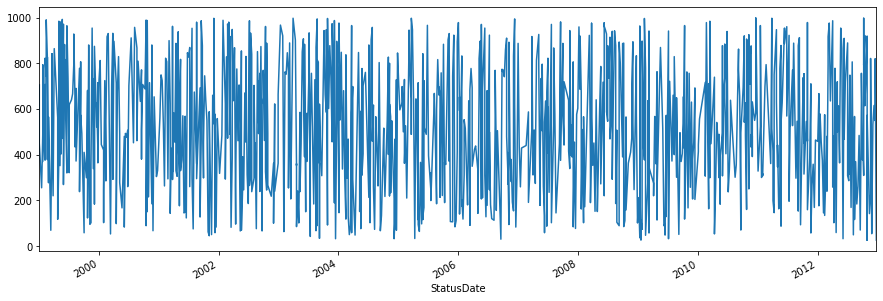

In [46]:
df["CustomerCount"].plot(figsize = (15,5));

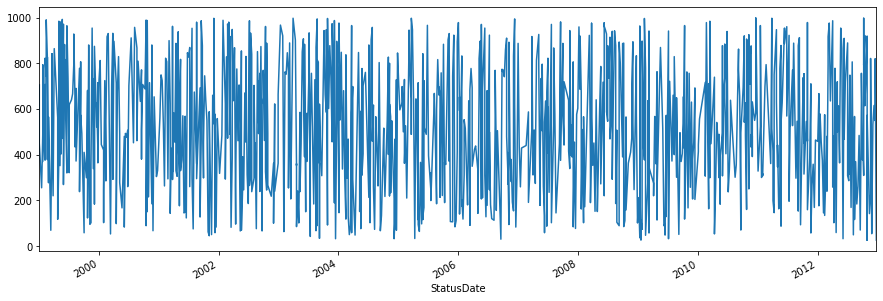

In [47]:
df["CustomerCount"].plot(figsize = (15,5))